In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [4]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [6]:
df = df.drop(df[df['math score']=='?'].index)
df = df.drop(df[df['math score']=='0'].index)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       964 non-null    object 
 1   race/ethnicity               964 non-null    object 
 2   parental level of education  964 non-null    object 
 3   lunch                        964 non-null    object 
 4   test preparation course      964 non-null    object 
 5   math score                   956 non-null    object 
 6   reading score                958 non-null    float64
 7   writing score                955 non-null    float64
dtypes: float64(2), object(6)
memory usage: 67.8+ KB


In [8]:
df['writing score'] = df['writing score'].fillna(method = 'ffill')
df['reading score'] = df['reading score'].fillna(method = 'ffill')
df['math score'] = df['math score'].fillna(method = 'ffill')

/tmp/ipykernel_36758/2696307197.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['writing score'] = df['writing score'].fillna(method = 'ffill')
/tmp/ipykernel_36758/2696307197.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['reading score'] = df['reading score'].fillna(method = 'ffill')
/tmp/ipykernel_36758/2696307197.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['math score'] = df['math score'].fillna(method = 'ffill')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       964 non-null    object 
 1   race/ethnicity               964 non-null    object 
 2   parental level of education  964 non-null    object 
 3   lunch                        964 non-null    object 
 4   test preparation course      964 non-null    object 
 5   math score                   964 non-null    object 
 6   reading score                964 non-null    float64
 7   writing score                964 non-null    float64
dtypes: float64(2), object(6)
memory usage: 67.8+ KB


In [10]:
df['math score'] = df['math score'].astype('int64')
df['reading score'] = df['reading score'].astype('int64')
df['writing score'] = df['writing score'].astype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       964 non-null    object
 1   race/ethnicity               964 non-null    object
 2   parental level of education  964 non-null    object
 3   lunch                        964 non-null    object
 4   test preparation course      964 non-null    object
 5   math score                   964 non-null    int64 
 6   reading score                964 non-null    int64 
 7   writing score                964 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 67.8+ KB


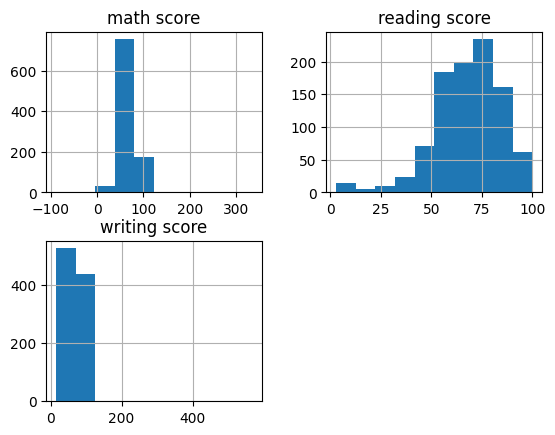

In [12]:
df.hist()
plt.show()

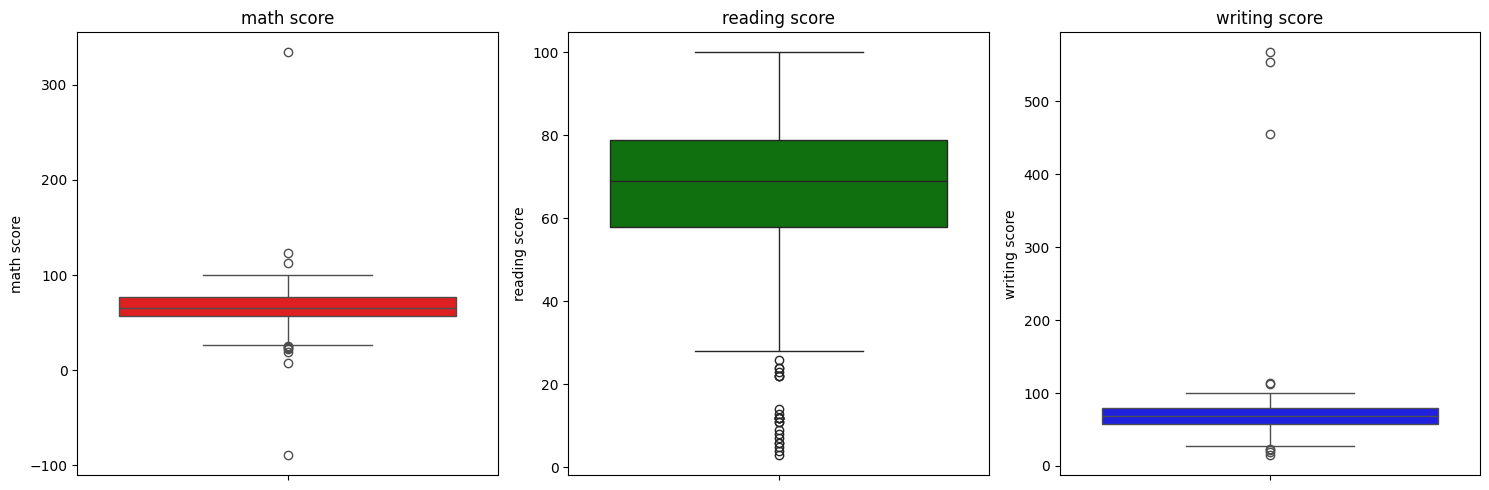

In [13]:
fig, axs = plt.subplots(1,3,figsize = (15,5))

sns.boxplot(df['math score'], ax = axs[0], color = 'r')
axs[0].set_title('math score')

sns.boxplot(df['reading score'] , ax = axs[1], color = 'g')
axs[1].set_title('reading score')

sns.boxplot(df['writing score'],  ax = axs[2], color = 'b')
axs[2].set_title('writing score')

plt.tight_layout()
plt.show()

In [14]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df = df[(df['math score']>lower) & ( df['math score'] < upper)]

In [15]:
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df = df[(df['reading score']>lower) & ( df['reading score'] < upper)]

In [16]:
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df = df[(df['writing score']>lower) & ( df['writing score'] < upper)]

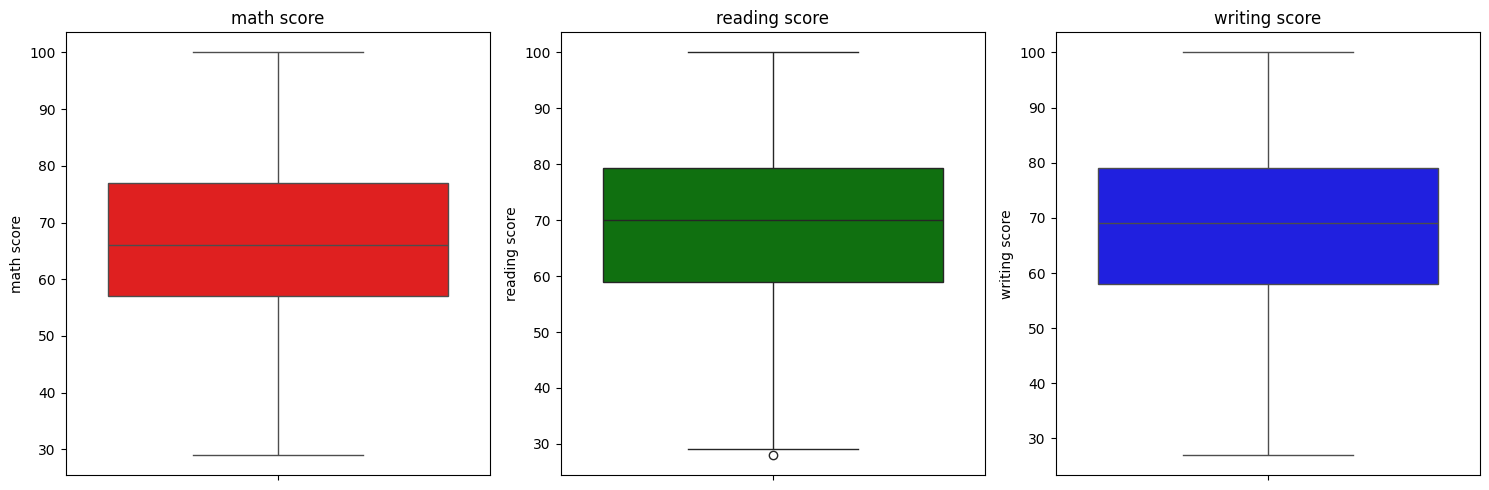

In [17]:
fig, axs = plt.subplots(1,3,figsize=(15,5))

sns.boxplot(df['math score'], ax = axs[0], color = 'r')
axs[0].set_title('math score')

sns.boxplot(df['reading score'], ax = axs[1], color = 'g')
axs[1].set_title('reading score')

sns.boxplot(df['writing score'], ax = axs[2], color = 'b')
axs[2].set_title('writing score')

plt.tight_layout()
plt.show()

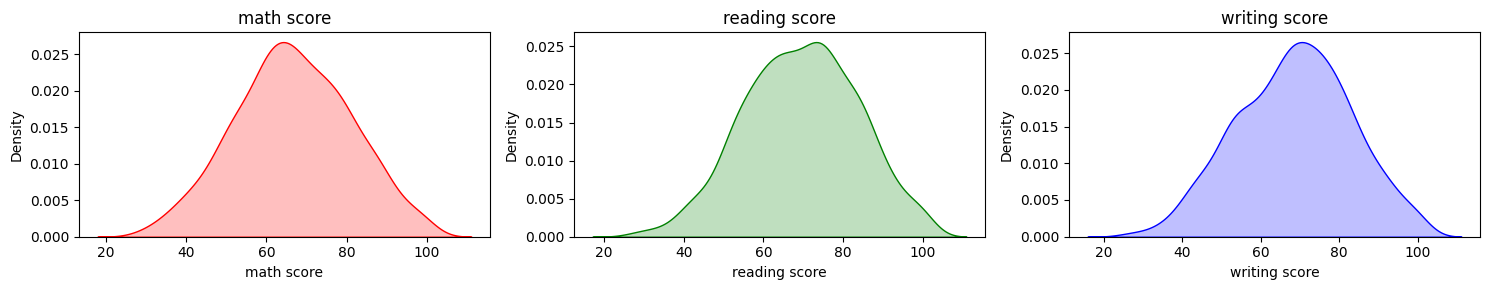

In [18]:
fig , axs = plt.subplots(1,3,figsize = (15,3))
sns.kdeplot(df['math score'], ax = axs[0], color = 'r', fill = True)
axs[0].set_title('math score')

sns.kdeplot(df['reading score'], ax = axs[1], color = 'g', fill = True)
axs[1].set_title('reading score')

sns.kdeplot(df['writing score'], ax = axs[2], color = 'b', fill = True)
axs[2].set_title('writing score')

plt.tight_layout()
plt.show()

In [19]:
print("skewness of Math Score Before", df['math score'].skew())
df['math score'] = np.sqrt(df['math score'])
print("skewness of Math Score After", df['math score'].skew())
print("skewness of Reading Score Before", df['reading score'].skew())
df['math score'] = np.sqrt(df['reading score'])
print("skewness of reading Score After", df['reading score'].skew())
print("skewness of writing Score Before", df['writing score'].skew())
df['math score'] = np.sqrt(df['writing score'])
print("skewness of writing Score After", df['writing score'].skew())

skewness of Math Score Before -0.01432479498955524
skewness of Math Score After -0.29831276043040905
skewness of Reading Score Before -0.10538689774704499
skewness of reading Score After -0.10538689774704499
skewness of writing Score Before -0.11892502740932523
skewness of writing Score After -0.11892502740932523


<Axes: xlabel='writing score', ylabel='Count'>

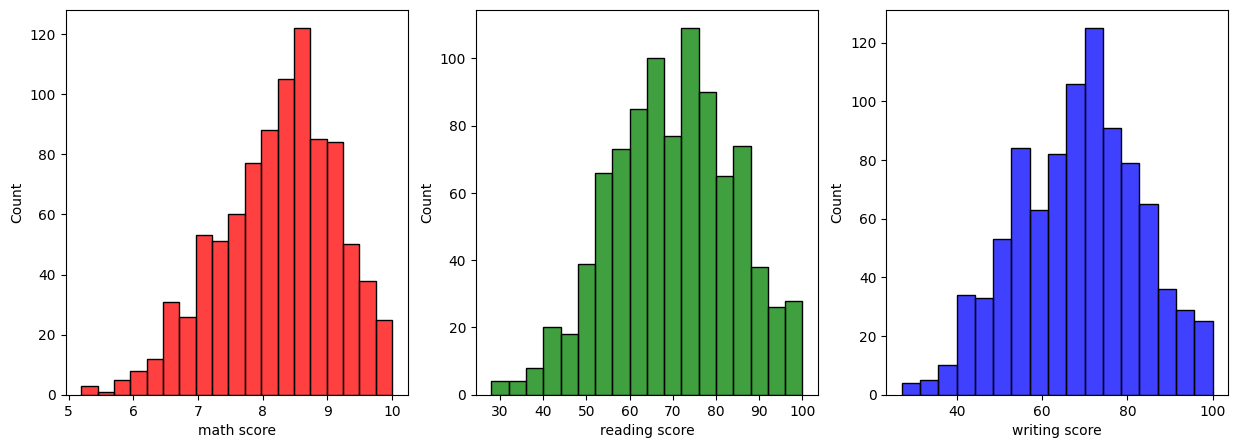

In [20]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

sns.histplot(df['math score'], ax=axs[0], color='r')
sns.histplot(df['reading score'], ax=axs[1], color='g')
sns.histplot(df['writing score'], ax=axs[2], color='b')